#Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing


##Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetable_Recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetable_Recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [5]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 595s 6s/step - accuracy: 0.0228 - loss: 17.3300 - val_accuracy: 0.0256 - val_loss: 3.5829
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.0323 - loss: 3.5813 - val_accuracy: 0.0370 - val_loss: 3.5802
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.0344 - loss: 3.5751 - val_accuracy: 0.0427 - val_loss: 3.5657
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.0431 - loss: 3.5569 - val_accuracy: 0.0541 - val_loss: 3.5442
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.0492 - loss: 3.5238 - val_accuracy: 0.0513 - val_loss: 3.5313
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.0545 - loss: 3.5270 - val_accuracy: 0.0712 - val_loss: 3.4875
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.0683 - loss: 3.4924 - val_accuracy: 0.0655 - val_loss: 3.5033
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.0569 - loss: 3.4885 - val_accuracy: 0.1026 - 

#Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 892ms/step - accuracy: 0.8593 - loss: 0.5563
Training accuracy: 0.8629213571548462


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8992 - loss: 0.6656
Validation accuracy: 0.8689458966255188


#Saving Model

In [20]:
cnn.save('/content/drive/MyDrive/Fruits_Vegetable_Recognition/trained_model.h5')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.024077046662569046,
  0.02985553815960884,
  0.03178170323371887,
  0.03852327540516853,
  0.04622792825102806,
  0.04783306643366814,
  0.06998395174741745,
  0.06292134523391724,
  0.07512038201093674,
  0.08603531122207642,
  0.10786516964435577,
  0.13001605868339539,
  0.14767254889011383,
  0.170786514878273,
  0.19839486479759216,
  0.22504012286663055,
  0.25650081038475037,
  0.29887640476226807,
  0.3158908486366272,
  0.3373996913433075,
  0.3820224702358246,
  0.41797754168510437,
  0.4593900442123413,
  0.4767255187034607,
  0.5239165425300598,
  0.5540931224822998,
  0.5858747959136963,
  0.6118780374526978,
  0.6285714507102966,
  0.6561797857284546,
  0.7049759030342102,
  0.7091493010520935],
 'loss': [6.934059143066406,
  3.5810208320617676,
  3.576517105102539,
  3.5608832836151123,
  3.5326812267303467,
  3.5288138389587402,
  3.4976887702941895,
  3.4786272048950195,
  3.4564132690429688,
  3.3909006118774414,
  3.3311262130737305,
  3.2384476661682

In [22]:
#Recording History in json
import json
with open('/content/drive/MyDrive/Fruits_Vegetable_Recognition/training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Calculating Accuracy of Model Achieved on Validation set

In [24]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 86.89458966255188 %


#Accuracy Visualization

##Training Visualization

In [25]:
training_history.history['accuracy']

[0.024077046662569046,
 0.02985553815960884,
 0.03178170323371887,
 0.03852327540516853,
 0.04622792825102806,
 0.04783306643366814,
 0.06998395174741745,
 0.06292134523391724,
 0.07512038201093674,
 0.08603531122207642,
 0.10786516964435577,
 0.13001605868339539,
 0.14767254889011383,
 0.170786514878273,
 0.19839486479759216,
 0.22504012286663055,
 0.25650081038475037,
 0.29887640476226807,
 0.3158908486366272,
 0.3373996913433075,
 0.3820224702358246,
 0.41797754168510437,
 0.4593900442123413,
 0.4767255187034607,
 0.5239165425300598,
 0.5540931224822998,
 0.5858747959136963,
 0.6118780374526978,
 0.6285714507102966,
 0.6561797857284546,
 0.7049759030342102,
 0.7091493010520935]

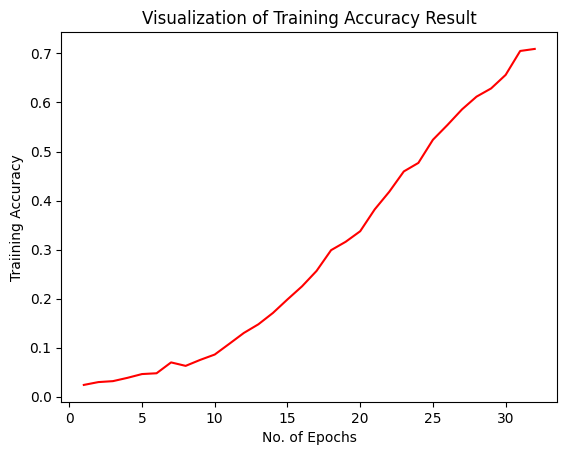

In [26]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

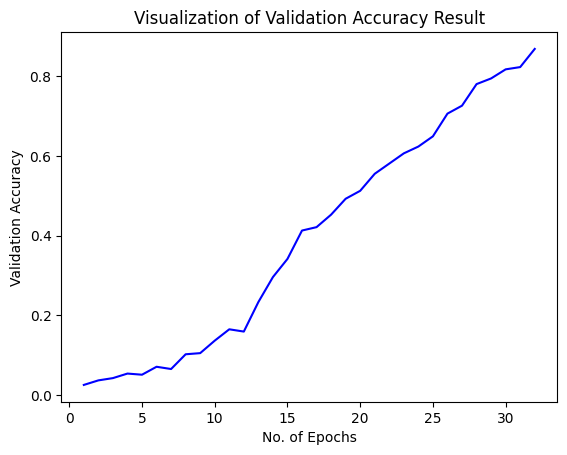

In [27]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set Evaluation

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetable_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [29]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.8730 - loss: 0.8868
Test accuracy: 0.8690807819366455
